# FRONTERA EFICIENTE

## Autor: María Carrasco Meléndez, Raquel Fort Serra y Lucía Saiz Lapique

__Práctica 3__

__Gestión de Activos y Carteras__

__CUNEF__

En el estudio a continuación, el objetivo es, con los datos estudiados anteriormente, calcular la frontera eficiente, es decir, el conjunto de las carteras más eficientes del mercado, teniendo en cuenta el mayor rendimiento posible con la menor cantidad de riesgo quue supongan.

Se ha decidido llevar a cabo este estudio específico con esta herramienta (Python), pues debido al resto de trabajos ejecutados en el curso, tenemos más soltura con este lenguaje que con Excel. Sin embargo, el análisis estratégico de los cuatro tipos de activo se ha realizado en excel pues, en ese caso y con el material proporcionado en clase, las estrategias resultaban más fáciles de manejar (sobretodo en grupo) con esa herramienta.

En primer lugar, cargamos las librerias necesarias y los datos recogidos después del análisis estratéico en cuestión.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import seaborn as sns

In [6]:
datos = pd.read_excel('datos python.xlsx')

In [7]:
datos.head()

,FECHA,NIKKEI Trend,US Treasury Trend,Oil Trend,NIKKEI RSI,US Treasury RSI,Oil RSI,Carry,NIKKEI Fund,US Treasury Fund,Oil Fund
0,2019-04-30,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000
1,2019-05-01,100.0,99.987366,99.757471,100.0,100.0,100.0,100.370061,100.423344,99.924195,100.485057
2,2019-05-02,100.0,99.932583,98.353652,100.0,100.0,100.0,99.871308,99.812743,99.595704,103.313174
3,2019-05-03,100.0,99.955824,98.457081,100.0,100.0,100.0,99.681614,99.592895,99.734681,103.095884
4,2019-05-06,100.0,99.993811,98.703462,100.0,100.0,100.0,99.942975,98.131546,99.962097,102.579905


En las 5 primeras líneas de la base de datos importada, vemos la estrategia generada para cada activo en el orden en el que se han estudiado anteriormente en los Excels.

Editamos la base de datos insertada para convertir los datos de la fecha en formato de fecha y eliminar la columna de indice que se incluyó al importar la base de datos.

In [8]:
datos['FECHA'] = pd.to_datetime(datos['FECHA'], format="%Y-%m-%d")
datos = datos.set_index('FECHA')

In [9]:
datos

,NIKKEI Trend,US Treasury Trend,Oil Trend,NIKKEI RSI,US Treasury RSI,Oil RSI,Carry,NIKKEI Fund,US Treasury Fund,Oil Fund
FECHA,,,,,,,,,,
2019-04-30,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
2019-05-01,100.000000,99.987366,99.757471,100.000000,100.00000,100.000000,100.370061,100.423344,99.924195,100.485057
2019-05-02,100.000000,99.932583,98.353652,100.000000,100.00000,100.000000,99.871308,99.812743,99.595704,103.313174
2019-05-03,100.000000,99.955824,98.457081,100.000000,100.00000,100.000000,99.681614,99.592895,99.734681,103.095884
2019-05-06,100.000000,99.993811,98.703462,100.000000,100.00000,100.000000,99.942975,98.131546,99.962097,102.579905
...,...,...,...,...,...,...,...,...,...,...
2020-04-27,109.341986,107.964346,730.142343,88.097658,100.04985,-26.665703,105.296317,85.980984,106.929184,34.331932
2020-04-28,109.353068,108.104259,742.711303,88.151229,100.04985,-26.665703,105.672050,84.740580,106.652041,33.149925
2020-04-29,109.353068,108.086033,660.856573,88.151229,100.04985,-26.665703,103.434273,85.118202,106.688003,40.456878


Graficamos los activos en función a cada estrategia y agrupándolos por ellas, para ver, de forma visual, el desempeño de cada uno. 

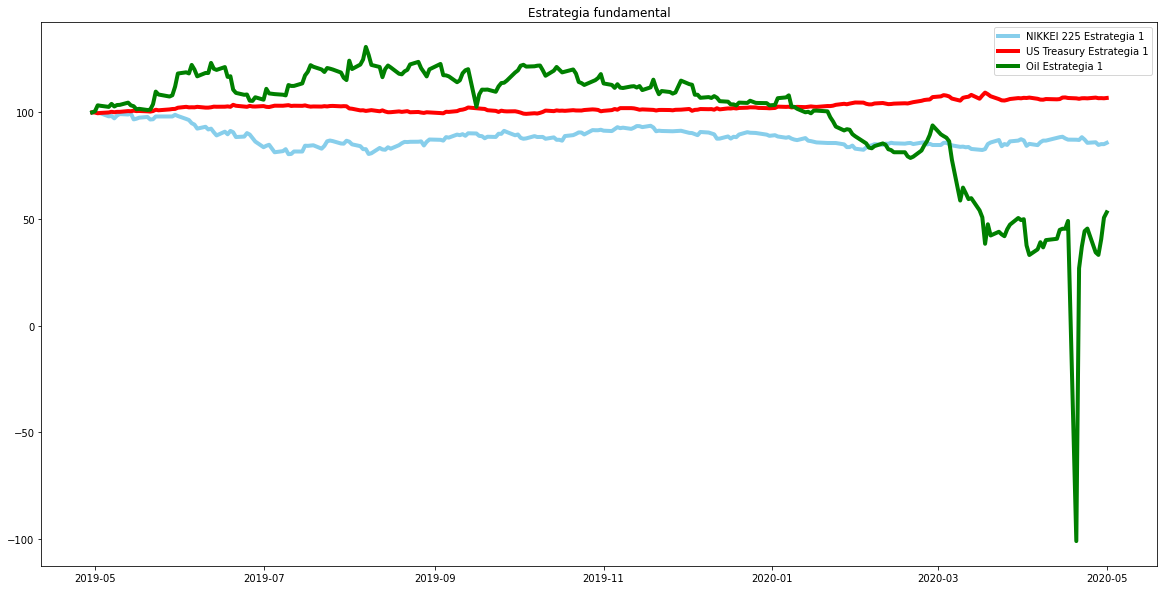

In [74]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['NIKKEI Fund'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'NIKKEI 225 Estrategia 1')
plt.plot(datos.index, datos['US Treasury Fund'], marker='', markerfacecolor='red', markersize=12, color='red', 
         linewidth=4, label = 'US Treasury Estrategia 1')
plt.plot(datos.index, datos['Oil Fund'], marker='', markerfacecolor='green', markersize=12, color='green', 
         linewidth=4, label = 'Oil Estrategia 1')
plt.title('Estrategia fundamental')
plt.legend()

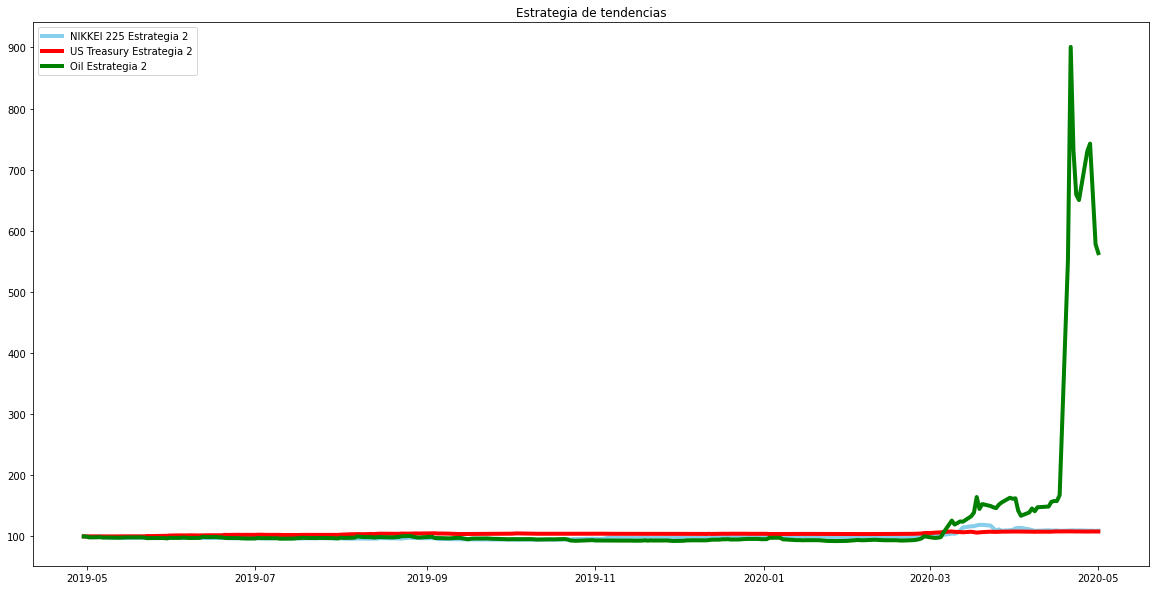

In [73]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['NIKKEI Trend'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'NIKKEI 225 Estrategia 2')
plt.plot(datos.index, datos['US Treasury Trend'], marker='', markerfacecolor='red', markersize=12, color='red', 
         linewidth=4, label = 'US Treasury Estrategia 2')
plt.plot(datos.index, datos['Oil Trend'], marker='', markerfacecolor='green', markersize=12, color='green', 
         linewidth=4, label = 'Oil Estrategia 2')
plt.title('Estrategia de tendencias')
plt.legend()

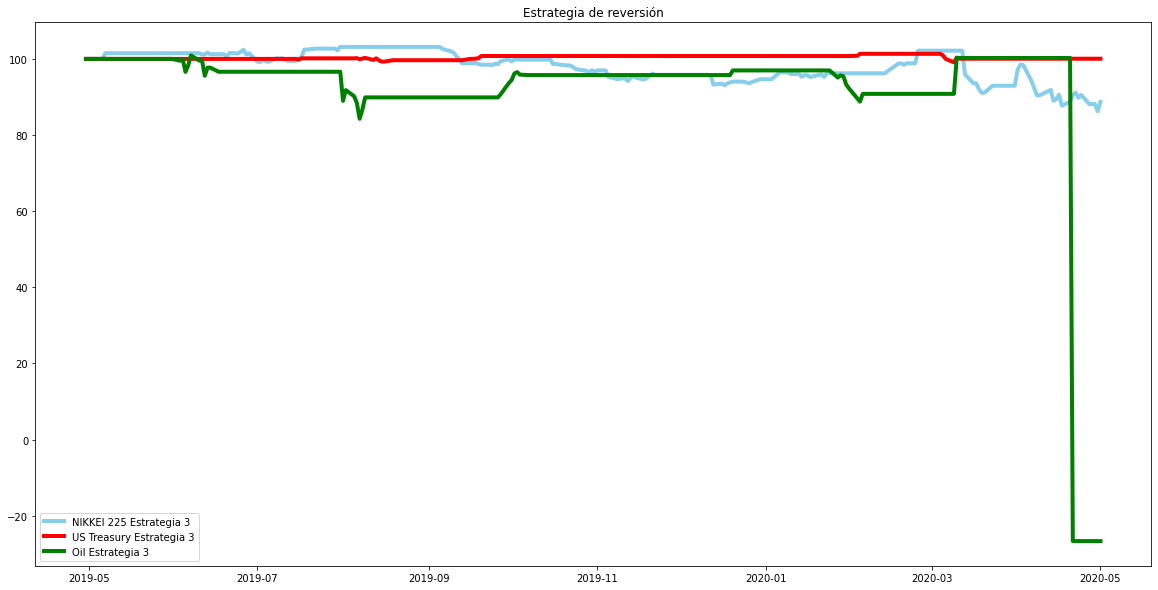

In [72]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['NIKKEI RSI'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'NIKKEI 225 Estrategia 3')
plt.plot(datos.index, datos['US Treasury RSI'], marker='', markerfacecolor='red', markersize=12, color='red', 
         linewidth=4, label = 'US Treasury Estrategia 3')
plt.plot(datos.index, datos['Oil RSI'], marker='', markerfacecolor='green', markersize=12, color='green', 
         linewidth=4, label = 'Oil Estrategia 3')
plt.title('Estrategia de reversión')
plt.legend()

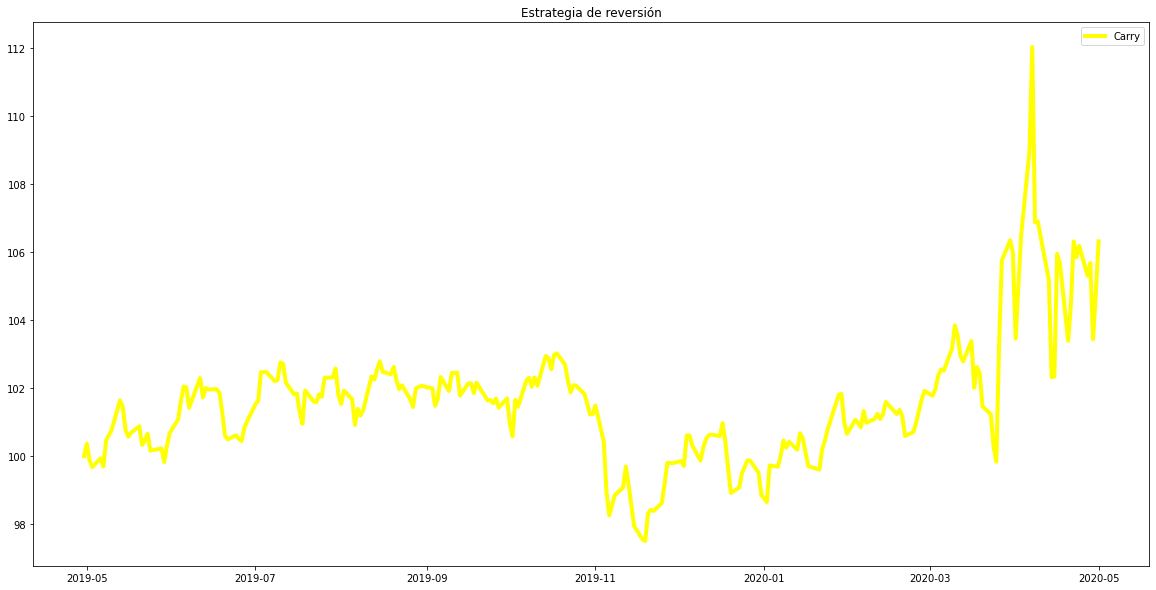

In [71]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Carry'], marker='', markerfacecolor='yellow', markersize=12, color='yellow', 
         linewidth=4, label = 'Carry')
plt.title('Estrategia de reversión')
plt.legend()

Del análisis visual previo, cabe mencionar que el activo más volátil o que más cambios sufre es el del petróleo con diferencia, mientras que el resto de activos siguen, relativamente, una misma linea.

A continuación, generamos una nueva base de datos que mantenga la fecha como índice y que calcule el rendimiento diario en comparación con el día anterior para cada variable.

In [14]:
df = datos.pct_change().dropna()

In [15]:
df.tail()

,NIKKEI Trend,US Treasury Trend,Oil Trend,NIKKEI RSI,US Treasury RSI,Oil RSI,Carry,NIKKEI Fund,US Treasury Fund,Oil Fund
FECHA,,,,,,,,,,
2020-04-27,-0.004510,-0.001629,0.122786,-0.027059,0.0,0.0,-0.008317,0.003002,0.003257,-0.245573
2020-04-28,0.000101,0.001296,0.017214,0.000608,0.0,0.0,0.003568,-0.014427,-0.002592,-0.034429
2020-04-29,0.000000,-0.000169,-0.110211,0.000000,0.0,0.0,-0.021177,0.004456,0.000337,0.220421
2020-04-30,-0.003562,0.000337,-0.125498,-0.021369,0.0,0.0,0.013085,-0.000305,-0.000675,0.250996
2020-05-01,0.004740,-0.000674,-0.024947,0.028442,0.0,0.0,0.014547,0.007337,0.001348,0.049894


Como primer parámetro que debemos introducir, consideramos que la mejor manera de elegir los pesos es asignandole a cada acción un peso proporcional al precio que tiene cada una de ellas. Por tanto, calculamos el valor mas reciente del precio total invertido por todas las acciones y los pesos adjudicados a cada uno seria el porcentaje resultando del precio de cada accion entre el precio total de la cartera. 

In [17]:
total = datos['NIKKEI Fund'][-1] + datos['US Treasury Fund'][-1] + datos['Oil Fund'][-1] + datos['Carry'][-1] +datos['NIKKEI Trend'][-1] + datos['US Treasury Trend'][-1] + datos['Oil Trend'][-1] + datos['NIKKEI RSI'][-1] + datos['US Treasury RSI'][-1] + datos['Oil RSI'][-1]  

In [18]:
#Creamos matriz de pesos para cada activo ("Equally weighted")
weights = [datos['NIKKEI Fund'][-1]/total, datos['US Treasury Fund'][-1]/total, 
           datos['Oil Fund'][-1]/total, datos['Carry'][-1]/total, datos['NIKKEI Trend'][-1]/total, 
           datos['US Treasury Trend'][-1]/total, datos['Oil Trend'][-1]/total, datos['NIKKEI RSI'][-1]/total, 
           datos['US Treasury RSI'][-1]/total, datos['Oil RSI'][-1]/total]

A continuación generamos una cartera de base con los pesos seleccionados, donde podemos ver su rendimiento esperado según esos pesos, los pesos activos seleccionados y la matriz de varianzas y covarianzas. 

In [19]:
n_assets = len(df.columns)
w = np.array(weights)
r = np.array(np.mean(df))
C = np.cov(df.transpose())

#Validamos
print("Rendimiento esperado:", r)
print("Pesos activos:", w)

Rendimiento esperado: [ 3.81432623e-04  3.06724430e-04  1.21780409e-02 -4.28154621e-04
  3.05920936e-06 -4.91235612e-03  2.69704027e-04 -5.42551474e-04
  2.64780764e-04 -1.55207904e-02]
Pesos activos: [ 0.06618722  0.08243597  0.04103012  0.0820903   0.08453651  0.08343192
  0.43511629  0.06850714  0.07725481 -0.02059027]


Generamos a continuación la matriz de correlaciones, además de un mapa de calor (heatmap), donde es posible observar estas correlaciones de forma mucho más visual.

In [58]:
cov = pd.DataFrame(C, columns = ['NIKKEI Trend', 'US Treasury Trend','Oil Trend','NIKKEI RSI','US Treasury RSI','Oil RSI', 
                                 'Carry', 'NIKKEI Fund', 'US Treasury Fund', 'Oil Fund'])
cov.index = ['NIKKEI Trend', 'US Treasury Trend','Oil Trend','NIKKEI RSI','US Treasury RSI','Oil RSI', 
                                 'Carry', 'NIKKEI Fund', 'US Treasury Fund', 'Oil Fund'] 
print('Matriz de covarianzas:')
cov

Matriz de covarianzas:


,NIKKEI Trend,US Treasury Trend,Oil Trend,NIKKEI RSI,US Treasury RSI,Oil RSI,Carry,NIKKEI Fund,US Treasury Fund,Oil Fund
NIKKEI Trend,4.989240e-05,1.504057e-06,0.000057,-6.697916e-06,-1.674678e-06,-0.000016,2.163370e-07,-1.644962e-06,2.522363e-06,-0.000079
US Treasury Trend,1.504057e-06,3.767776e-06,0.000013,3.010986e-06,-1.098095e-06,-0.000010,4.093346e-07,5.555040e-07,-2.886146e-06,-0.000010
Oil Trend,5.684861e-05,1.261363e-05,0.023185,1.112343e-04,-1.320497e-05,-0.003146,-1.732779e-04,-1.171296e-05,-2.427171e-05,-0.031679
NIKKEI RSI,-6.697916e-06,3.010986e-06,0.000111,8.540481e-05,-5.260008e-08,-0.000099,7.418013e-09,2.190145e-06,-2.449887e-07,-0.000254
US Treasury RSI,-1.674678e-06,-1.098095e-06,-0.000013,-5.260008e-08,2.204202e-06,0.000006,-3.482222e-07,3.788234e-08,1.403610e-06,0.000013
Oil RSI,-1.574976e-05,-1.036931e-05,-0.003146,-9.924239e-05,5.880758e-06,0.006437,-4.894456e-05,-1.896131e-06,2.029105e-05,0.006247
Carry,2.163370e-07,4.093346e-07,-0.000173,7.418013e-09,-3.482222e-07,-0.000049,5.756096e-05,-4.862938e-06,-2.015652e-07,0.000248
NIKKEI Fund,-1.644962e-06,5.555040e-07,-0.000012,2.190145e-06,3.788234e-08,-0.000002,-4.862938e-06,1.283191e-04,-1.312741e-06,0.000103
US Treasury Fund,2.522363e-06,-2.886146e-06,-0.000024,-2.449887e-07,1.403610e-06,0.000020,-2.015652e-07,-1.312741e-06,1.450249e-05,0.000035
Oil Fund,-7.857934e-05,-1.029664e-05,-0.031679,-2.541839e-04,1.347295e-05,0.006247,2.479427e-04,1.026566e-04,3.497424e-05,0.046385


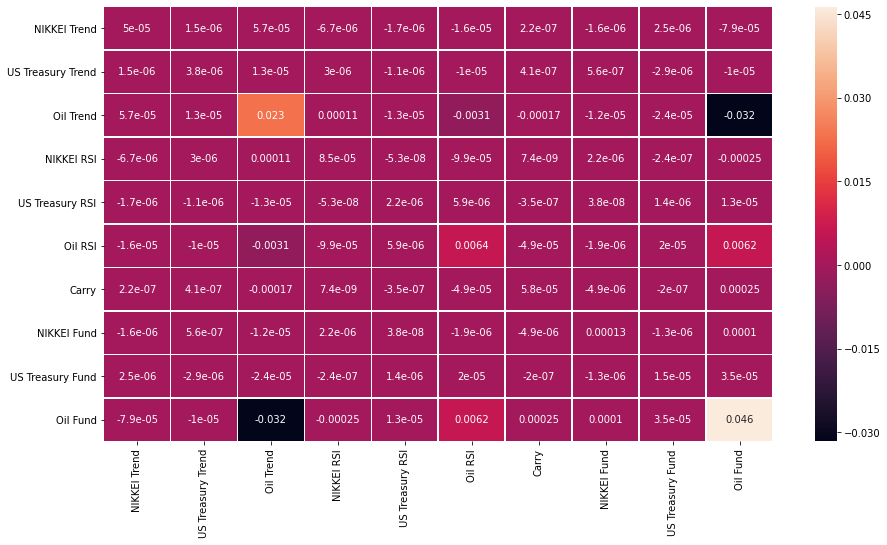

In [59]:
plt.figure(figsize = (15,8))
ax = sns.heatmap(cov, linewidth=0.8, annot = True)
plt.show()

Estudiamos además la contribución del riesgo a cada activo:

In [53]:
def risk_contribution(w,C):
    """
    Compute the contributions to risk of the constituents of a portfolio, given a set of portfolio weights and a covariance matrix
    """
    port_variance = np.dot(w.T, np.dot(C, w))
    # Marginal contribution of each constituent
    marginal_contrib = C@w
    risk_contrib = np.multiply(marginal_contrib,w.T)/port_variance
    return risk_contrib

In [54]:
risk_contrib = risk_contribution(result['x'], C)
risk_contrib

array([ 4.15509477e-04,  6.61662192e-05,  1.16848840e+00,  4.98815180e-04,
       -6.70571642e-05, -1.12577514e-02, -1.44464546e-03,  6.11614351e-05,
       -1.02689993e-04, -1.56657913e-01])

In [55]:
rend = w * r * 252
rend

array([ 6.36198293e-03,  6.37185169e-03,  1.25915942e-01, -8.85713023e-03,
        6.51709502e-05, -1.03281519e-01,  2.95728594e-02, -9.36649939e-03,
        5.15480792e-03,  8.05334840e-02])

In [61]:
rendimiento = pd.DataFrame(rend, columns = ['Rendimiento'], index = ['NIKKEI Trend', 'US Treasury Trend','Oil Trend','NIKKEI RSI','US Treasury RSI','Oil RSI', 
                                 'Carry', 'NIKKEI Fund', 'US Treasury Fund', 'Oil Fund'])
rendimiento['Riesgo'] = risk_contrib.tolist()
rendimiento

,Rendimiento,Riesgo
NIKKEI Trend,0.006362,0.000416
US Treasury Trend,0.006372,0.000066
Oil Trend,0.125916,1.168488
NIKKEI RSI,-0.008857,0.000499
US Treasury RSI,0.000065,-0.000067
Oil RSI,-0.103282,-0.011258
Carry,0.029573,-0.001445
NIKKEI Fund,-0.009366,0.000061
US Treasury Fund,0.005155,-0.000103
Oil Fund,0.080533,-0.156658


En el gráfico a continuación, se puede observar una comparación del rendimiento y los riesgos de cada activo con las distintas estrategias por separado.

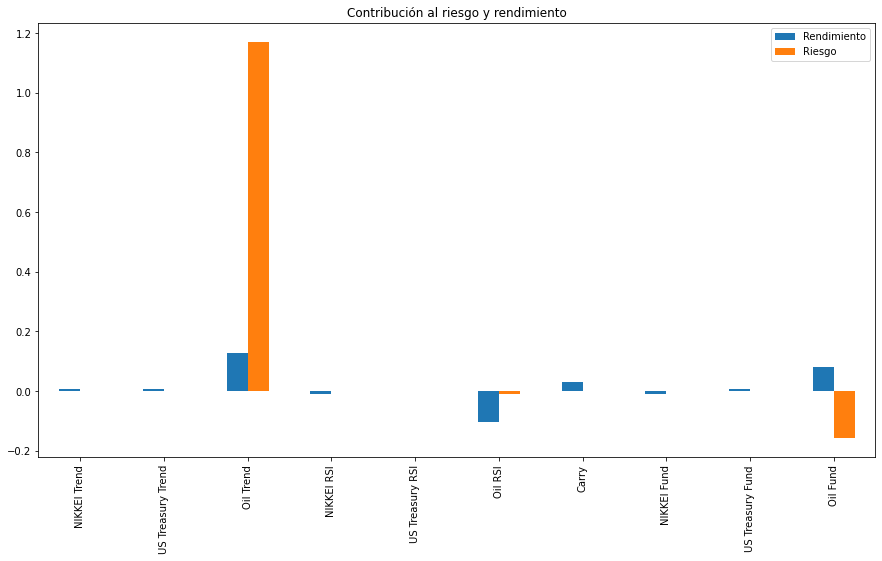

In [64]:
rendimiento.plot.bar(title = "Contribución al riesgo y rendimiento", figsize = (15, 8))

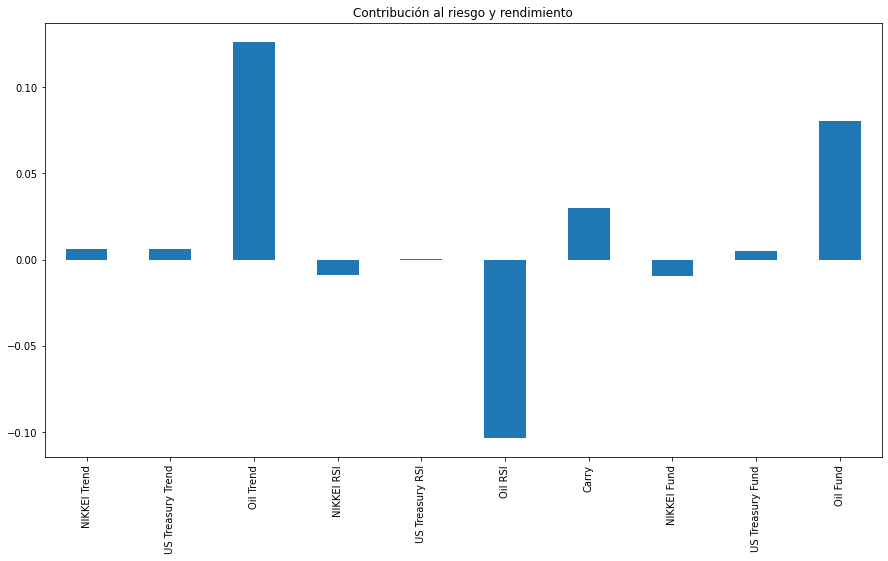

In [76]:
rendimiento.Rendimiento.plot.bar(title = "Contribución al rendimiento", figsize = (15, 8))

A continuación, se incluyen una serie de funciones para calcular el rendimiento anualizado del portfolio, la desviación estandar anualizada del portfolio (el riesgo), el ratio de Sharp, donde podemos alterad el rendimiento deseado (en este caso se ha seleccionado 0.04 porque era el valor máximo de rendimiento con el cual se mantenía positivo el ratio de Sharpe), los portfolios aleatorios para graficar y la tangente con la frontera eficiente.

In [43]:
def mu(w,r):
    '''Rendimiento portfolio anualizado'''
    return sum(w * r * 252) 


def sigma(w, C):
    '''Desv STD portadolio anualizada'''
    return np.dot(w,np.dot(C,w.T)) ** (1/2) * 252 ** (1/2)


def sharpe(w):
    '''Sharpe ratio con rf de 10%'''
    '''CAMBIAR RENDIMIENTO AQUI'''
    rf = .10
    return (mu(w,r) - rf) / sigma(w,C)


def neg_sharpe(w):
    '''Sharpe ratio negativo'''
    return -sharpe(w)


def random_ports(n):
    '''Portfolios aleatorios'''
    means, stds = [],[]
    for i in range(n):
        rand_w = np.random.rand(len(df.columns))
        rand_w = rand_w / sum(rand_w)
        means.append(mu(rand_w, r))
        stds.append(sigma(rand_w,C))
    
    return means, stds

In [44]:
np.random.rand(len(df.columns))

array([0.53063841, 0.87906802, 0.28543771, 0.36577164, 0.52475249,
       0.74958279, 0.06220625, 0.93404878, 0.68837248, 0.84512393])

### Un portafolio "Equally weighted" tendría un Sharpe Ratio de:

In [45]:
print("Sharpe port equal w:", round(sharpe(w),2))

Sharpe port equal w: 0.19


Con el código a continuación, generamos los pesos óptimos de nuestra cartera, donde podemos indicar si solicitaoms pesos mínimos o máximos para cualquiera de las acciones incluidas en nuestra cartera. En este caso, se selecciona que haya al menos un 5% de representación de cada acción en la cartera total, pues si no se selecciona un mínimo, la función elige invertir unicamente en dos de ellas. Además, incluimos también un máximo, para que no haya tanto desbalanceo, pero de todas formas hay tres acciones principales con mayor peso (las que tienen menos riesgo).

En el resumen a continuación, al final del todo, nombrados con una x, vemos la selección de pesos óptimos que ha realizado la función con los parámetros introducidos:[0.06555819, 0.05 , 0.5, 0.05, 0.05, 0.05, 0.08444181, 0.05, 0.05, 0.05])

In [46]:
import scipy.optimize as optimize

def apply_sum_constraint(inputs):
    total = 1 - np.sum(inputs)
    return total

my_constraints = ({'type': 'eq', "fun": apply_sum_constraint })


result = optimize.minimize(neg_sharpe, 
                      w,
                      method='SLSQP', 
                      bounds=((0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5)),
                      options={'disp': True},
                      constraints=my_constraints)
print(result)
optimal_w = result["x"]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.149219322562852
            Iterations: 3
            Function evaluations: 36
            Gradient evaluations: 3
     fun: -1.149219322562852
     jac: array([-0.08601166, -0.0735016 , -0.29295538,  0.11618827, -0.00228952,
        0.9427717 , -0.08562854,  0.13410965, -0.06712358,  0.19557892])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.06555819, 0.05      , 0.5       , 0.05      , 0.05      ,
       0.05      , 0.08444181, 0.05      , 0.05      , 0.05      ])


Por último, generamos un gráfico que muestre todas las carteraas aleatorias generadas, que seleccione la que considera la mejor y muestre la frontera eficiente, que vemos de forma más clara con la tangente.

El rendimiento de la cartera óptima es 1.284 y su volatilidad es 1.03


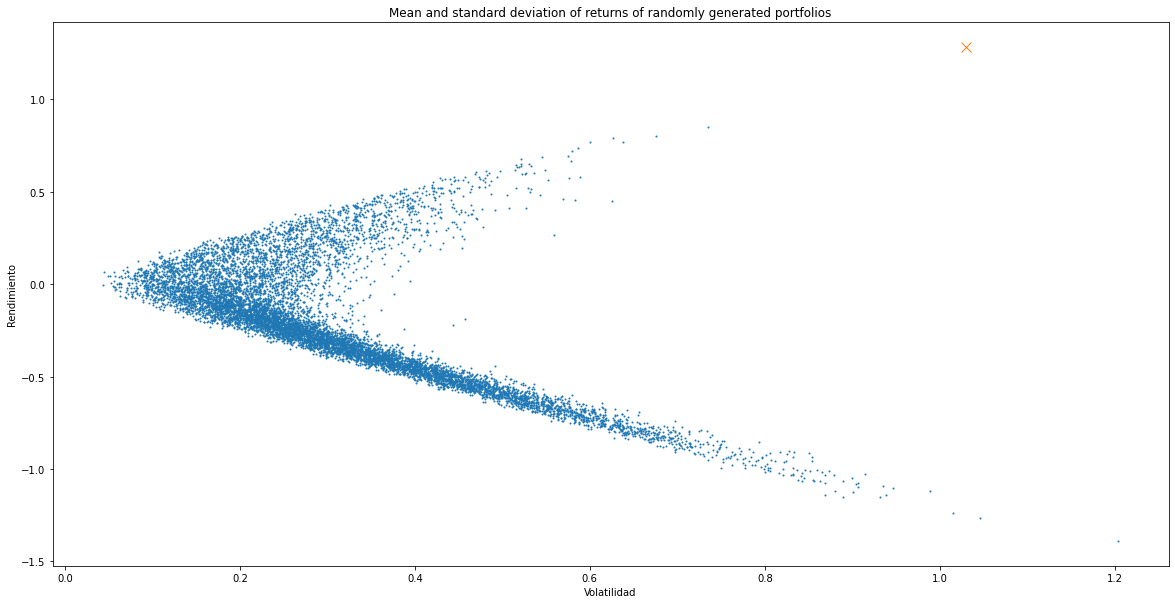

In [65]:
#Grafiquemos
n_portfolios = 10000   # generamos 8000 carteras aleatorias
means, stds = random_ports(n_portfolios) # generamos rendimientos y riesgos aleatorios

best_mu = mu(optimal_w, r) 
best_sigma = sigma(optimal_w, C)
best_sharpe = sharpe(optimal_w) ## la mejor cartera se seleccionara en base a los pesos óptimos, los renidmientos y el riesgo
# introducidos anteriormente
plt.figure(figsize=(20,10))
plt.plot(stds, means, 'o', markersize=1)
plt.plot(best_sigma, best_mu, 'x',  markersize=10)
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
print('El rendimiento de la cartera óptima es', round(best_mu, 3), 'y su volatilidad es', round(best_sigma, 3))

Para terminar el estudio, creamos una nueva variable con la cartera final aplicando la combinación de todos los activos y estraetgias en base a los pesos óptimos y la comparamos con los tres activos y las tres estrategias que lo analizan, además de la estrategia de carry.

In [47]:
cartera = datos*optimal_w
cartera['Suma'] = cartera.sum(axis = 1)
cartera

,NIKKEI Trend,US Treasury Trend,Oil Trend,NIKKEI RSI,US Treasury RSI,Oil RSI,Carry,NIKKEI Fund,US Treasury Fund,Oil Fund,Suma
FECHA,,,,,,,,,,,
2019-04-30,6.555819,5.000000,50.000000,5.000000,5.000000,5.000000,8.444181,5.000000,5.000000,5.000000,100.000000
2019-05-01,6.555819,4.999368,49.878736,5.000000,5.000000,5.000000,8.475430,5.021167,4.996210,5.024253,99.950982
2019-05-02,6.555819,4.996629,49.176826,5.000000,5.000000,5.000000,8.433315,4.990637,4.979785,5.165659,99.298669
2019-05-03,6.555819,4.997791,49.228541,5.000000,5.000000,5.000000,8.417296,4.979645,4.986734,5.154794,99.320620
2019-05-06,6.555819,4.999691,49.351731,5.000000,5.000000,5.000000,8.439366,4.906577,4.998105,5.128995,99.380284
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,7.168262,5.398217,365.071171,4.404883,5.002493,-1.333285,8.891412,4.299049,5.346459,1.716597,405.965258
2020-04-28,7.168989,5.405213,371.355652,4.407561,5.002493,-1.333285,8.923140,4.237029,5.332602,1.657496,412.156889
2020-04-29,7.168989,5.404302,330.428286,4.407561,5.002493,-1.333285,8.734178,4.255910,5.334400,2.022844,371.425677


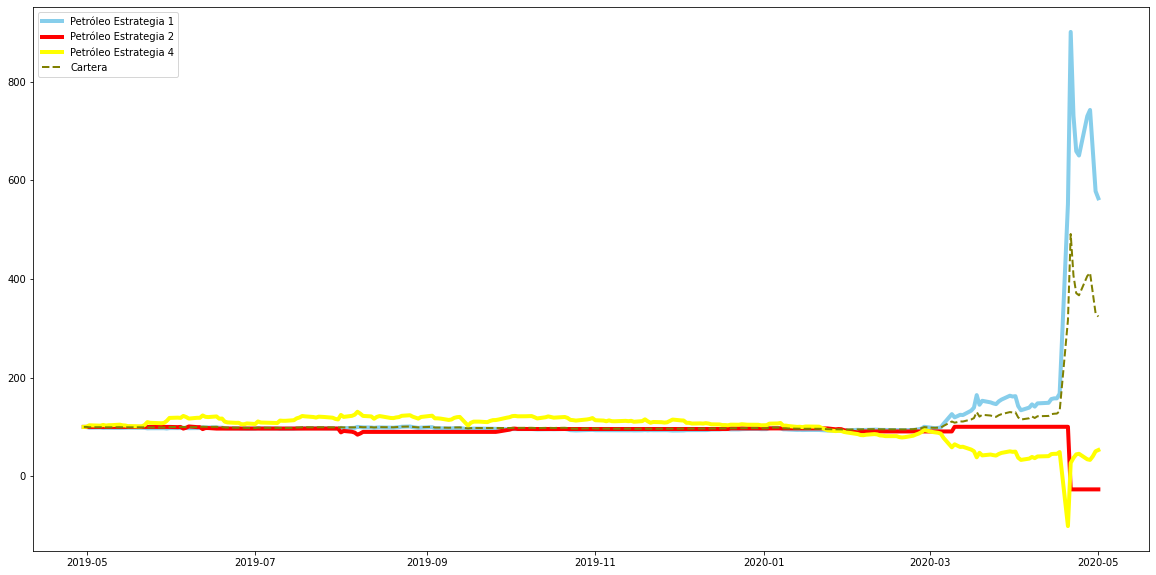

In [66]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Oil Trend'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Petróleo Estrategia 1')
plt.plot(datos.index, datos['Oil RSI'], marker='', markerfacecolor='red', markersize=12, color='red', 
         linewidth=4, label = 'Petróleo Estrategia 2')
plt.plot(datos.index, datos['Oil Fund'], marker='', markerfacecolor='yellow', markersize=12, color='yellow', 
         linewidth=4, label = 'Petróleo Estrategia 4')
plt.plot(cartera.index, cartera['Suma'], marker='', color='olive', linewidth=2, linestyle='dashed', label="Cartera")
plt.legend()

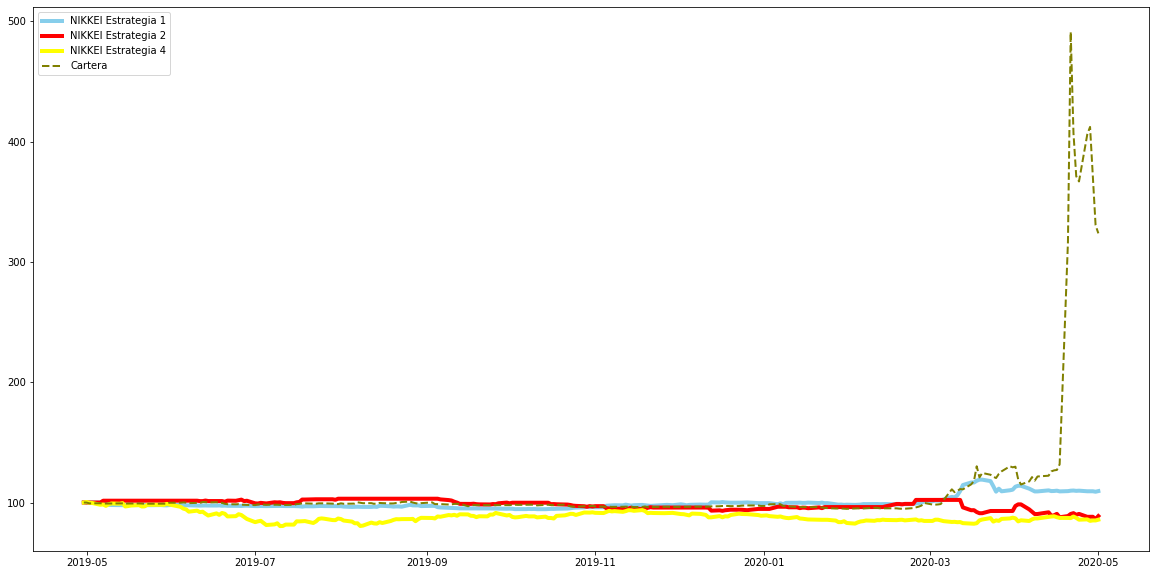

In [67]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['NIKKEI Trend'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'NIKKEI Estrategia 1')
plt.plot(datos.index, datos['NIKKEI RSI'], marker='', markerfacecolor='red', markersize=12, color='red', 
         linewidth=4, label = 'NIKKEI Estrategia 2')
plt.plot(datos.index, datos['NIKKEI Fund'], marker='', markerfacecolor='yellow', markersize=12, color='yellow', 
         linewidth=4, label = 'NIKKEI Estrategia 4')
plt.plot(cartera.index, cartera['Suma'], marker='', color='olive', linewidth=2, linestyle='dashed', label="Cartera")
plt.legend()

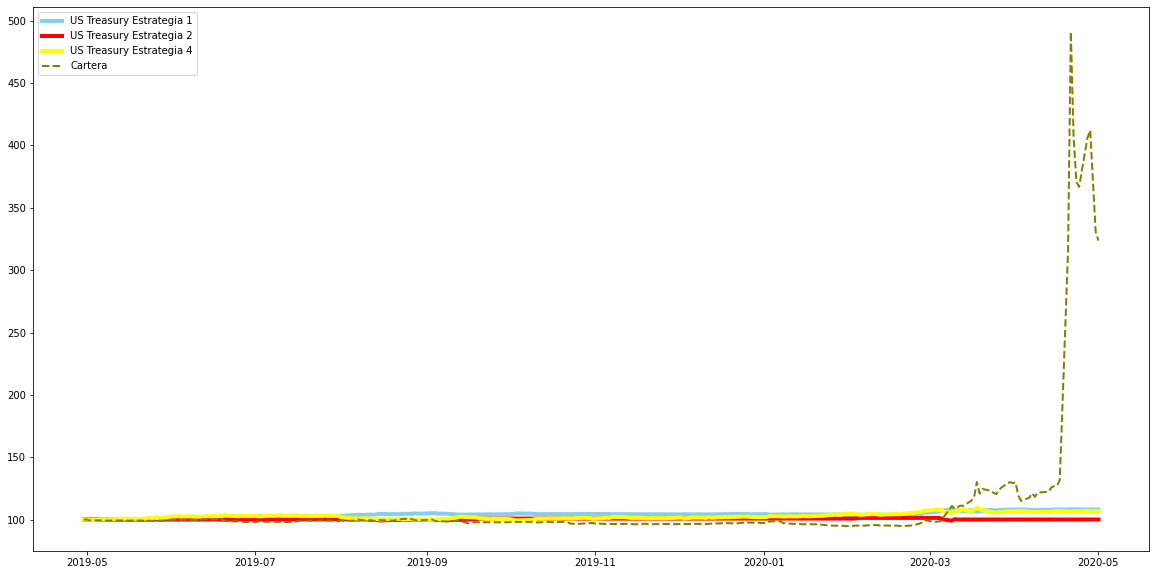

In [68]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['US Treasury Trend'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'US Treasury Estrategia 1')
plt.plot(datos.index, datos['US Treasury RSI'], marker='', markerfacecolor='red', markersize=12, color='red', 
         linewidth=4, label = 'US Treasury Estrategia 2')
plt.plot(datos.index, datos['US Treasury Fund'], marker='', markerfacecolor='yellow', markersize=12, color='yellow', 
         linewidth=4, label = 'US Treasury Estrategia 4')
plt.plot(cartera.index, cartera['Suma'], marker='', color='olive', linewidth=2, linestyle='dashed', label="Cartera")
plt.legend()

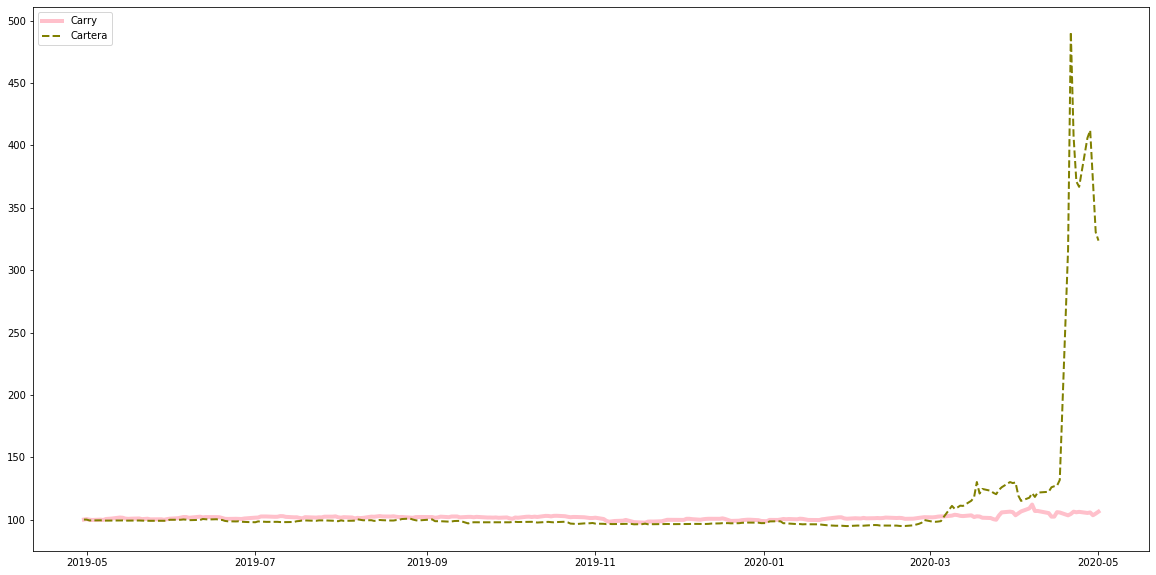

In [75]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Carry'], marker='', markerfacecolor='pink', markersize=12, color='pink', 
         linewidth=4, label = 'Carry')
plt.plot(cartera.index, cartera['Suma'], marker='', color='olive', linewidth=2, linestyle='dashed', label="Cartera")
plt.legend()

__Bibliografía:__

* https://www.linkedin.com/pulse/frontera-eficiente-en-python-oscar-rojas-cfa
* http://amarjen.github.io/dibujar-frontera-eficiente.html#.XqR0ImgzZPY